In [143]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

C:\Users\aariz\AppData\Local\Temp\ipykernel_37644\3711262352.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(plate)


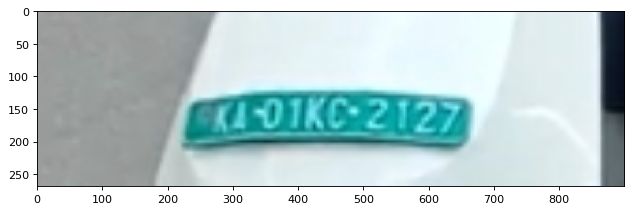

In [144]:
plate = imread('./images/Nplate.png')
plt.figure(figsize=(8,6), dpi=80)
imshow(plate)

Defining the kernals


Text(0.5, 1.0, 'Gaussian Blur')

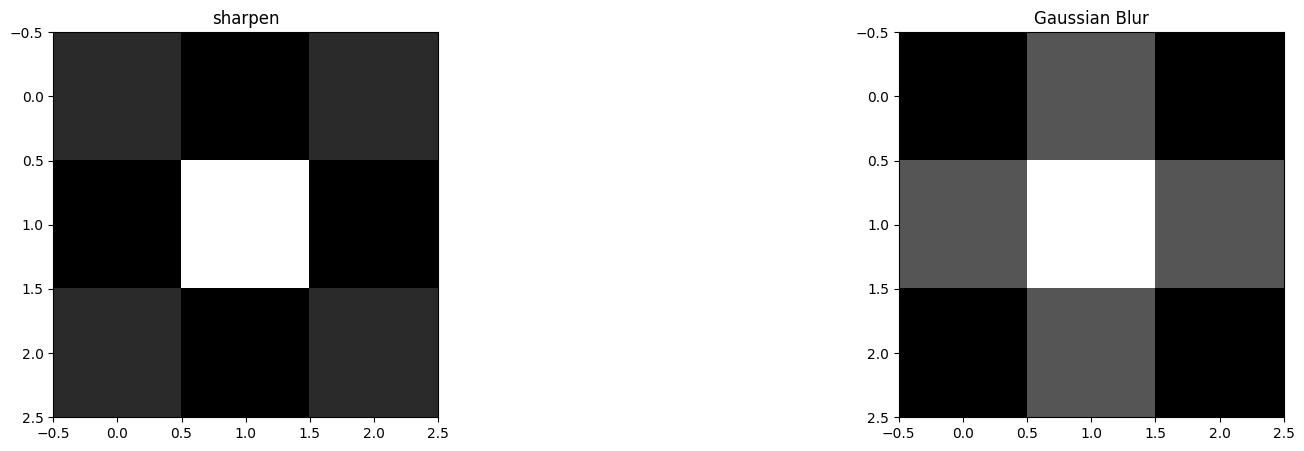

In [145]:
# sharpen 
sharpen = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])

# gaussian blur 
gaussian =      np.array([[1.,2.,1.],
                          [2.,4.,2.],
                          [1.,2.,1.]])/16

fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].imshow(sharpen, cmap='gray')
ax[0].set_title(f'sharpen')

ax[1].imshow(gaussian, cmap='gray')
ax[1].set_title(f'Gaussian Blur')

```plaintext

Applying the blurring kernal

Text(0.5, 1.0, 'blur')

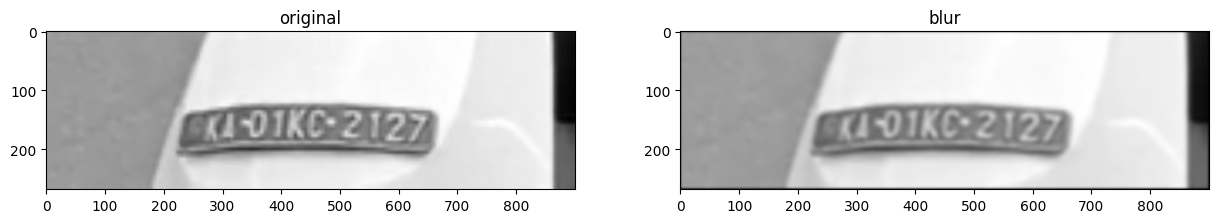

In [146]:
def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        # same - the output image will be same size as the input image
        image = convolve2d(image, kernel, 'same', boundary='fill', fillvalue=0)
    return image

# all rows all cols, only 1st 3 ele
plateRGB = plate[:,:,:3]
plateGray = rgb2gray(plateRGB)
convImg = multi_convolver(plateGray, gaussian, 10)

plt.figure(figsize=(15,5))
plt.subplot(121); plt.imshow(plateGray, cmap='gray'); plt.title('original')
plt.subplot(122); plt.imshow(convImg, cmap='gray'); plt.title('blur')

Seeing the difference over multiple iterations

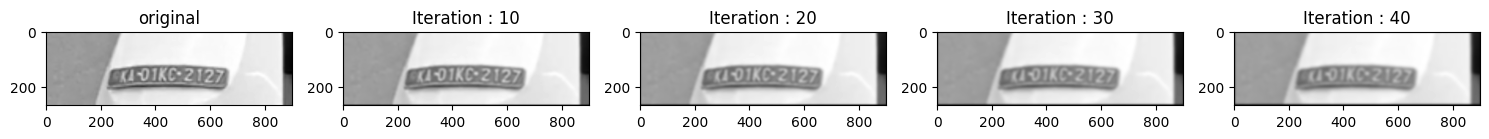

In [147]:
def multipleIterations(image, kernal):
    iterations = [10, 20, 30, 40]
    
    fig, ax = plt.subplots(1,5, figsize = (15,7))
    ax[0].set_title('original')
    ax[0].imshow(image, cmap='gray')
    
    for n, ax in enumerate(ax[1:], start=1):
        ax.set_title(f'Iteration : {iterations[n-1]}')
        ax.imshow(multi_convolver(image, kernal, iterations[n-1]), cmap='gray')
        
    fig.tight_layout()
    
multipleIterations(plateGray, gaussian)

C:\Users\aariz\AppData\Local\Temp\ipykernel_37644\2679741519.py:29: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(convRGBImg)


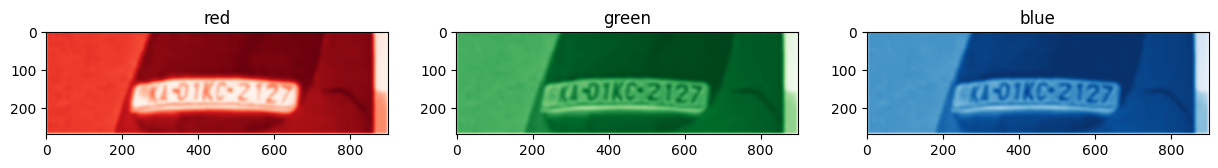

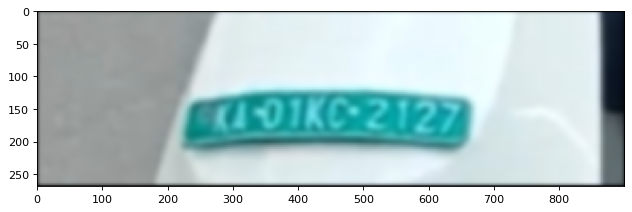

In [148]:
def convRGB(image, kernal, iterations = 20):
    convImgR = multi_convolver(image[:,:,0], kernal, iterations)
    convImgG = multi_convolver(image[:,:,1], kernal, iterations)
    convImgB = multi_convolver(image[:,:,2], kernal, iterations)
    
    reformedImg = np.dstack((np.rint(np.abs(convImgR)),
                             np.rint(np.abs(convImgG)),
                             np.rint(np.abs(convImgB))))/255
    
    
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    
    ax[0].imshow(abs(convImgR), cmap='Reds')
    ax[0].set_title("red")
    
    ax[1].imshow(abs(convImgG), cmap='Greens')
    ax[1].set_title('green')
    
    ax[2].imshow(abs(convImgB), cmap='Blues')
    ax[2].set_title('blue')
    
    return np.array(reformedImg)

plateRGB = plate[:,:,:3]

convRGBImg = convRGB(plateRGB, gaussian)

plt.figure(figsize=(8,6), dpi=80)
imshow(convRGBImg)

```plaintext
sharpnening the image

C:\Users\aariz\AppData\Local\Temp\ipykernel_37644\1358476959.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(convRGBSharp)
C:\Users\aariz\AppData\Roaming\Python\Python312\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.0392156862745097].


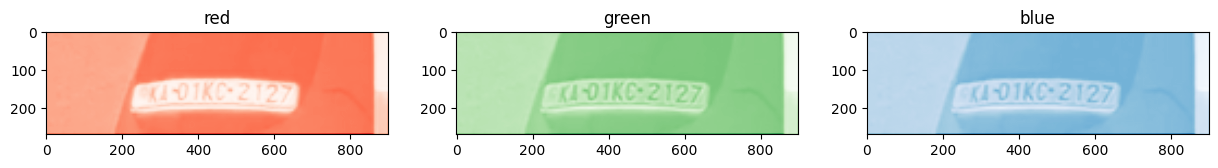

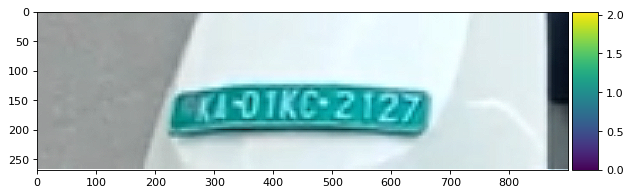

In [170]:
plateRGB = plate[:,:,:3]
convRGBSharp = convRGB(plateRGB, sharpen, 1)

plt.figure(figsize=(8,4), dpi=80)
imshow(convRGBSharp)

We can see that in the above image after applying the sharpning kernal, we see that there is some `distortion`, the resons for this are 

RGB color space - In RGB color spacing each value the `3 values come together to determine the color and brightness (luminescence)` of the pixel. 
When applying CNN we are modifying the RGB values directly, leading to change in color and brightness of the image. 

Solution - we can `seperate` Luminescence and color 

Convert the color image from RGB color space to a color space that separates brightness form color such as *`HSV, YUV`*
In these color spaces one channel represents the brightness( **`Y`** in YUV, **`V`** in HSV) and the other channel represents the color info. 

Applying the CNN on the brightness, this way we are able to make changes to the brightness without affecting the color. 

### YUV

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6502862745098048..7.1613607843137235].


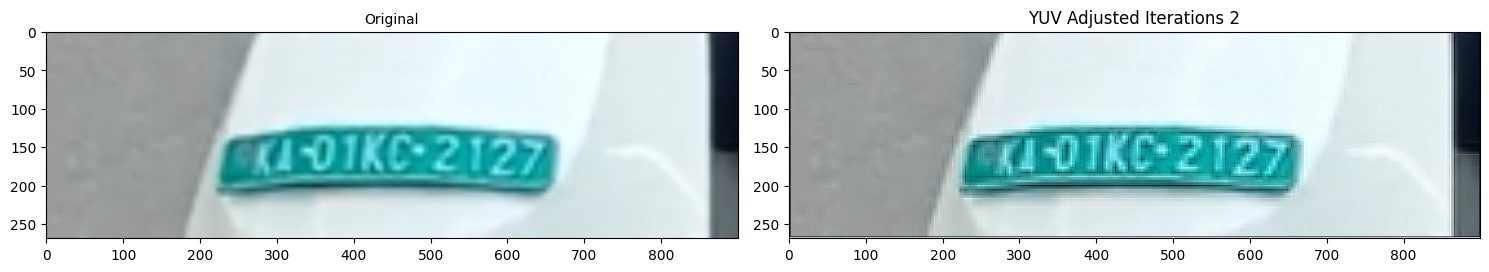

In [219]:
def convRGB_YUV(image, kernel, iterations = 1):
    plateYUV = rgb2yuv(image)
    plateYUV[:,:,0] = multi_convolver(plateYUV[:,:,0], kernel, iterations)    # selectimg the Y channel 
    finalImg = yuv2rgb(plateYUV)
    
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    
    ax[0].imshow(image)
    ax[0].set_title(f'Original', fontsize=10)
    
    ax[1].imshow(finalImg)
    ax[1].set_title(f'YUV Adjusted Iterations {iterations}')
    
    fig.tight_layout()
    
    return finalImg

plateRGB = plate[:,:,:3]
finalImg = convRGB_YUV(plateRGB, sharpen, 2) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..7.219607843137255].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6502862745098048..7.1613607843137235].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5882352941176459..7.219607843137254].


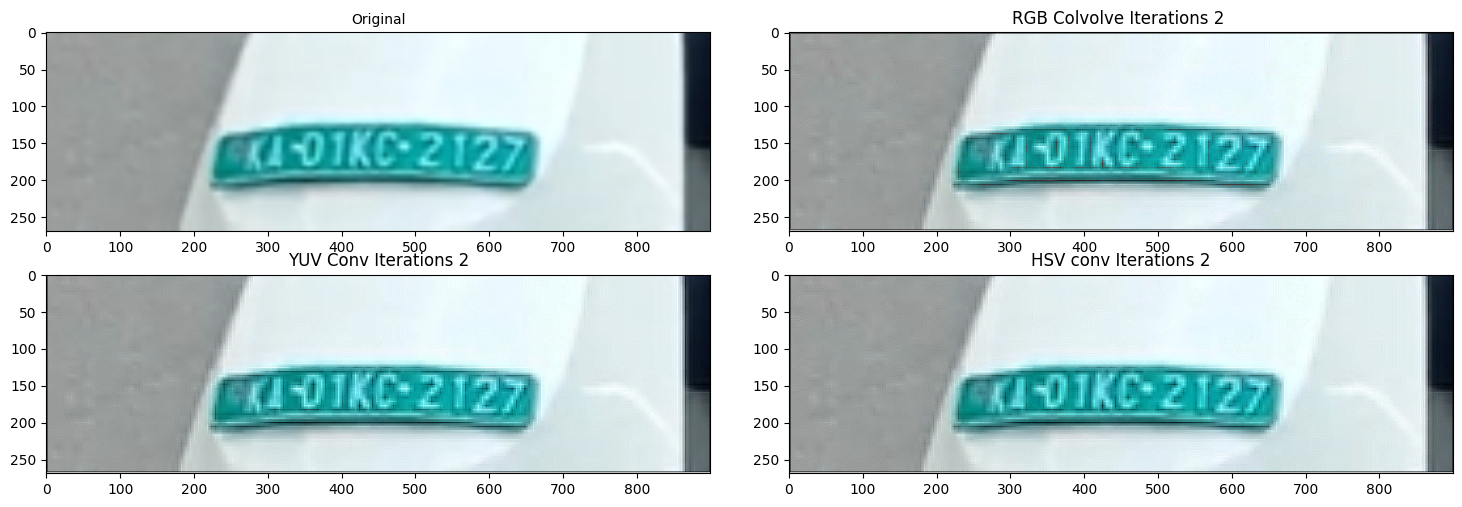

In [238]:
def convCompare(image, kernal, iterations = 1):
    
    imgConvR = multi_convolver(image[:,:,0], kernal, iterations)
    imgConvG = multi_convolver(image[:,:,1], kernal, iterations)
    imgConvB = multi_convolver(image[:,:,2], kernal, iterations)
    
    reformedImage = np.dstack((np.rint(np.abs(imgConvR)),
                              np.rint(np.abs(imgConvG)),
                              np.rint(np.abs(imgConvB))))/255
    
    fig, ax = plt.subplots(2,2,figsize=(15,5))
    
    imgYUV = rgb2yuv(image)
    imgYUV[:,:,0] = multi_convolver(imgYUV[:,:,0], kernal, iterations)
    finalYUV = yuv2rgb(imgYUV)
    
    imgHSV = rgb2hsv(image)
    imgHSV[:,:,2] = multi_convolver(imgHSV[:,:,2], kernal, iterations)
    finalHSV = hsv2rgb(imgHSV)
    
    ax[0][0].imshow(image)
    ax[0][0].set_title(f'Original', fontsize=10)
    
    ax[0][1].imshow(reformedImage)
    ax[0][1].set_title(f"RGB Colvolve Iterations {iterations} ")
    
    ax[1][0].imshow(finalYUV)
    ax[1][0].set_title(f'YUV Conv Iterations {iterations}')
    
    ax[1][1].imshow(finalHSV)
    ax[1][1].set_title(f"HSV conv Iterations {iterations}")
    
    
    fig.tight_layout()
    
plateRGB = plate[:,:,:3]
finalImg = convCompare(plateRGB, sharpen, 2) 